# PSM for lake varve thickness

In this tutorial, we introduce the PSM for lake varve thickness in `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

## Data preparation

### Proxy

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
pdb = cfr.ProxyDatabase().from_df(df)

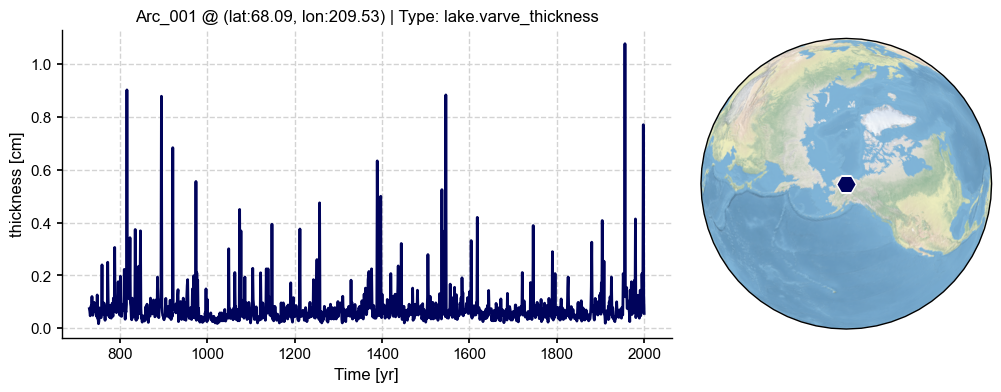

In [8]:
pdb_lake = pdb.filter(by='ptype', keys=['varve'])
pobj = pdb_lake.records['Arc_001']
fig, ax = pobj.plot()

### Model

In [9]:
dirpath = '/Volumes/ExtraDrive/Data/GCM_sims/icesm_last_millennium_historical'

model_tas = cfr.ClimateField().load_nc(os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))

## Get climate data for a specific `ProxyRecord`

In [11]:
%%time

pobj.del_clim()
pobj.get_clim(model_tas, tag='model')

ProxyRecord.clim deleted for Arc_001.
ProxyRecord.clim["model_tas"] created.
CPU times: user 38.7 ms, sys: 1.81 ms, total: 40.5 ms
Wall time: 39.9 ms


## Create a PSM object

In [12]:
mdl = cfr.psm.Lake_VarveThickness(pobj)

In [14]:
%%time
pp = mdl.forward()

CPU times: user 645 ms, sys: 27.7 ms, total: 673 ms
Wall time: 675 ms


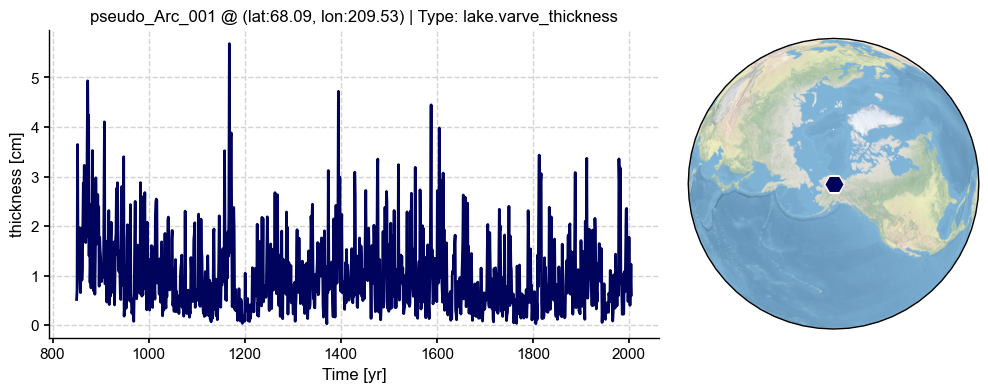

In [15]:
fig, ax = pp.plot()